In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import metrics
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score


In [3]:
# creating Dataframe
df = pd.read_csv('train.csv' )

In [4]:
# check type of columns
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [5]:
# check null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
# Split DataFrame
X = df.drop(columns=['price_range'])
Y = df['price_range']

In [7]:
# checking  number  of target
Y.value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

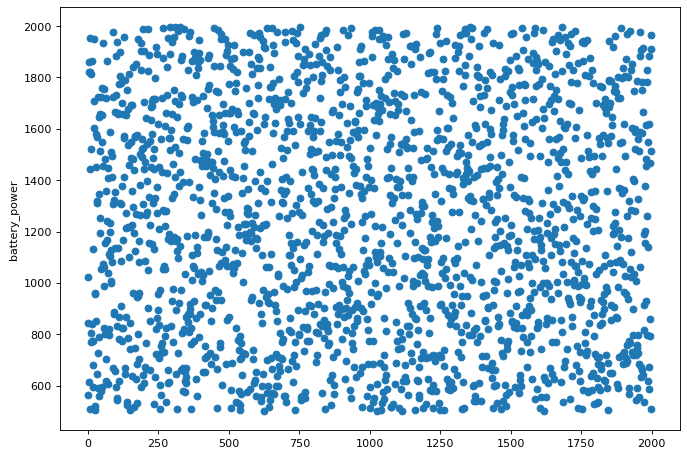

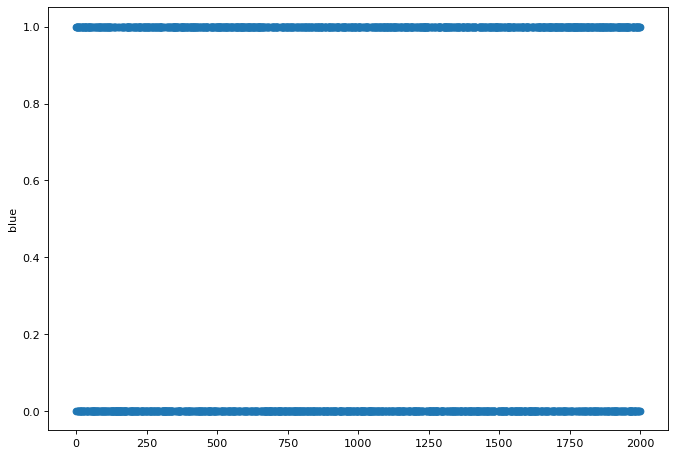

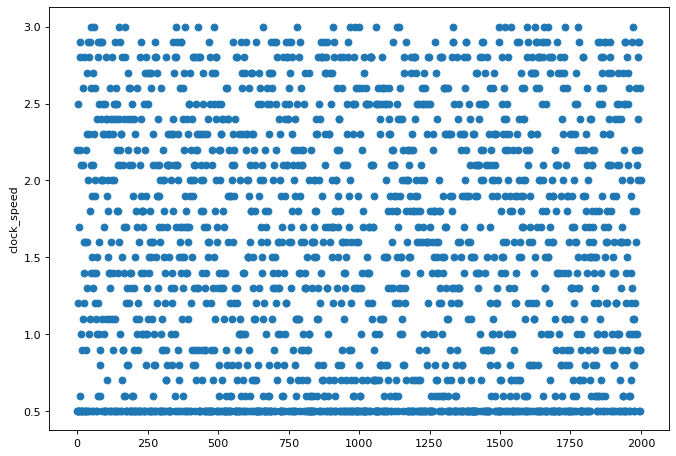

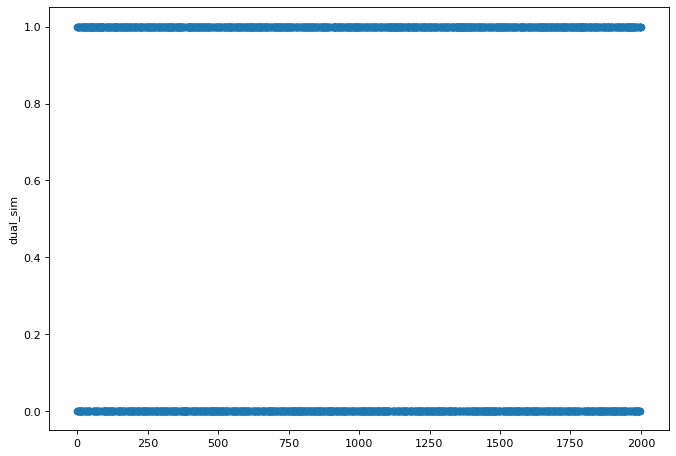

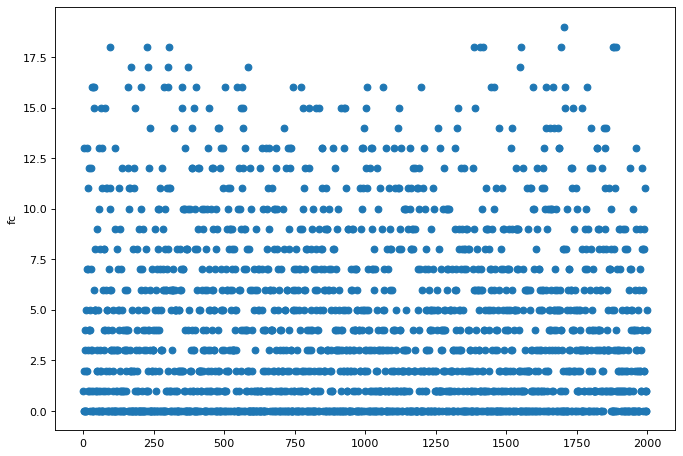

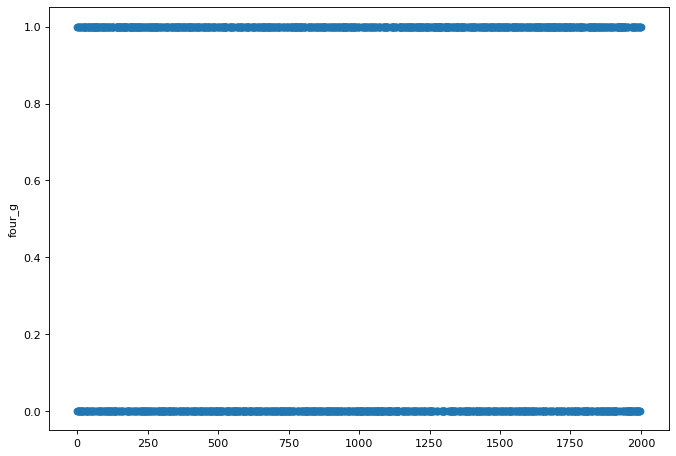

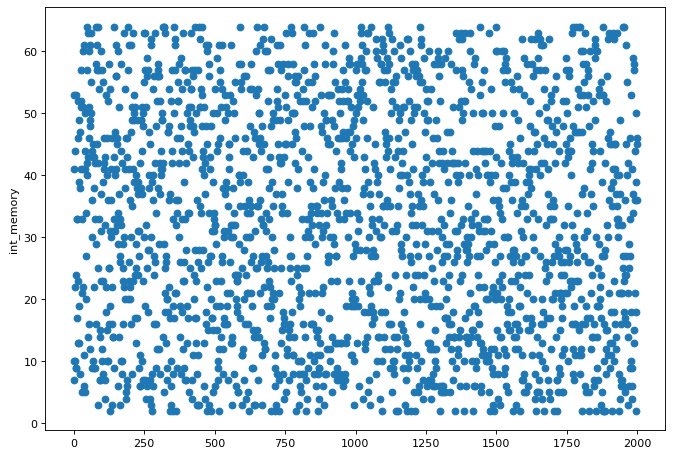

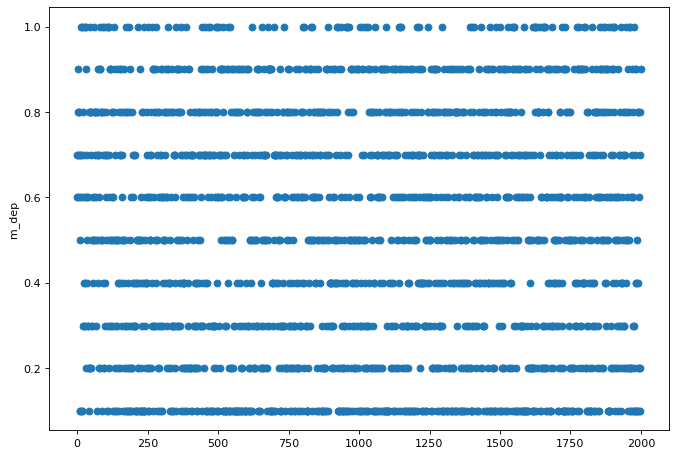

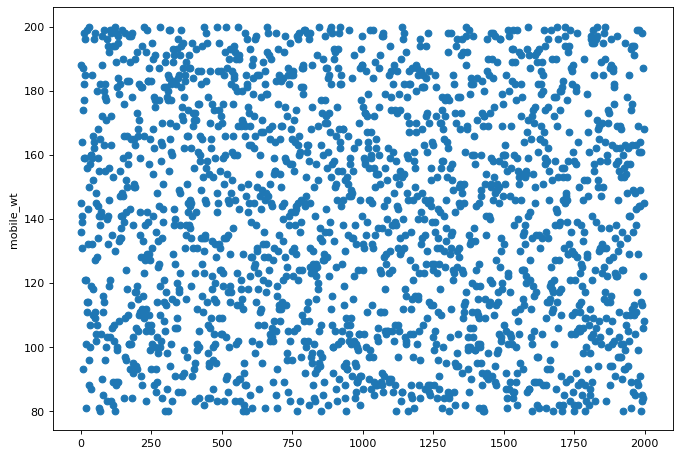

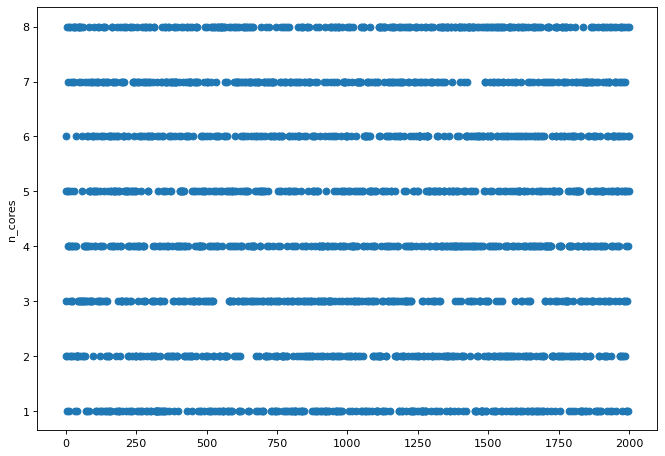

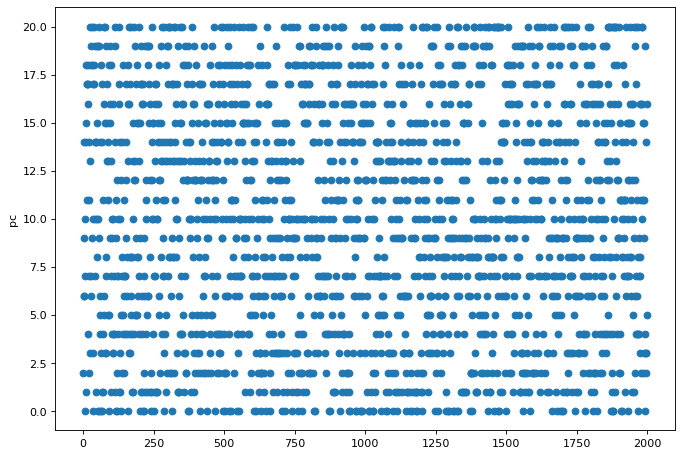

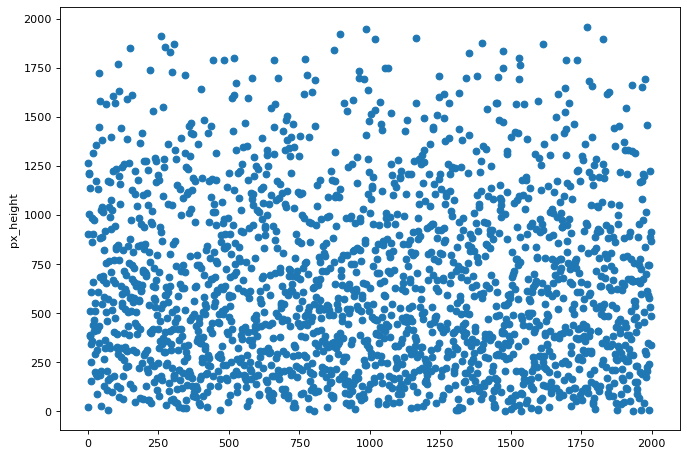

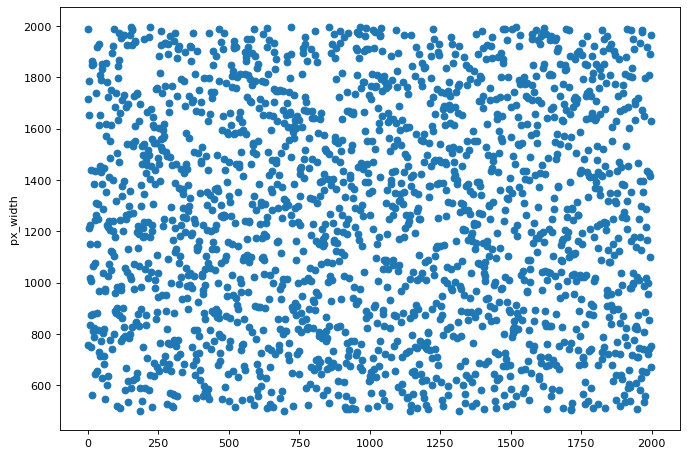

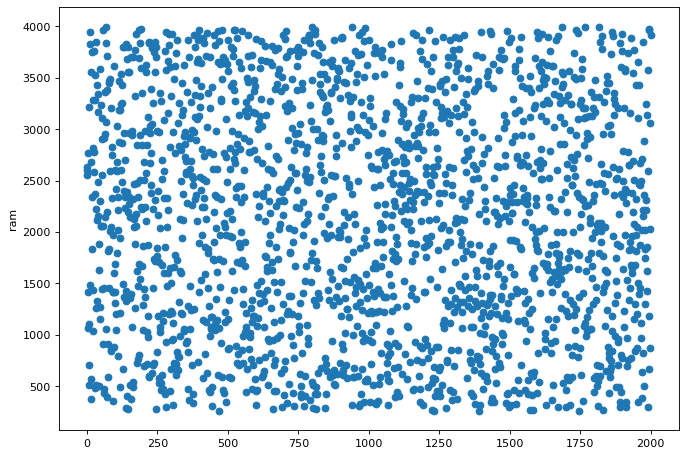

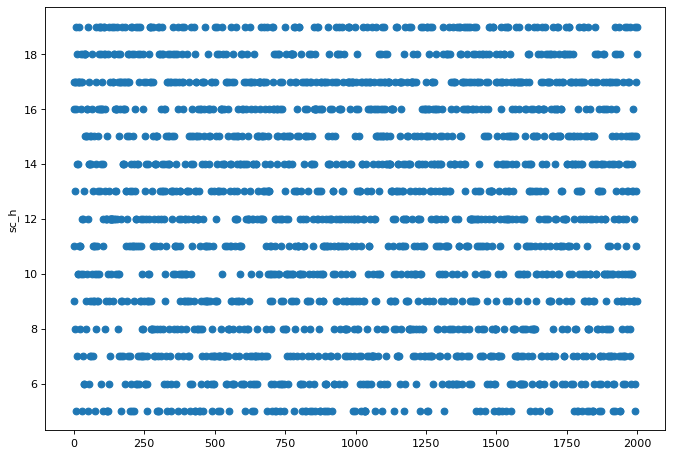

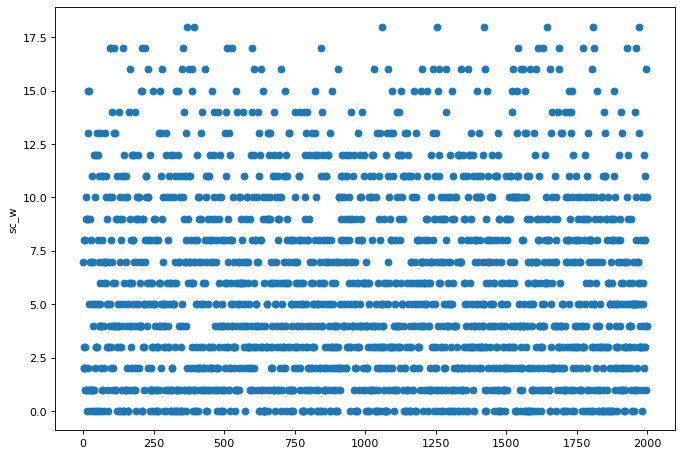

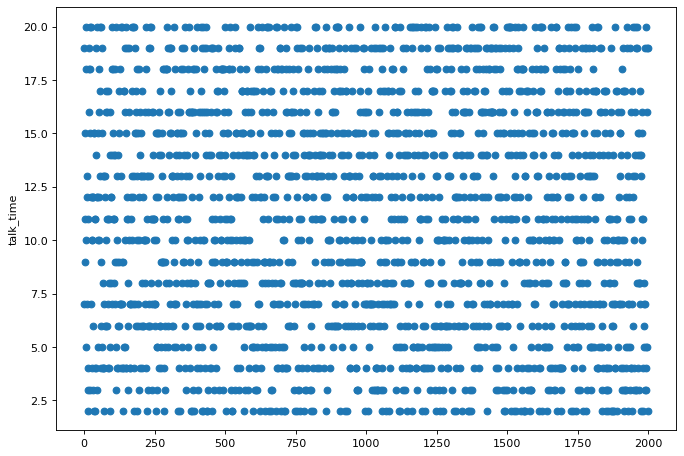

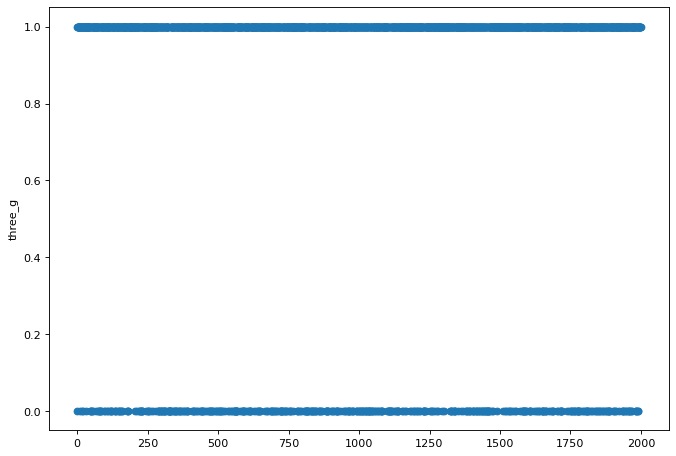

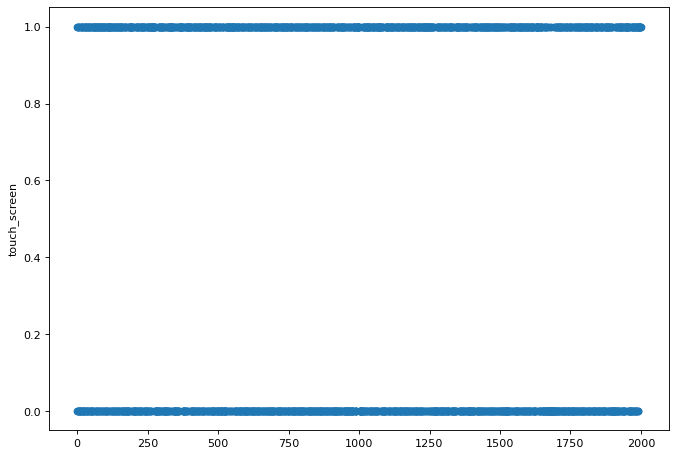

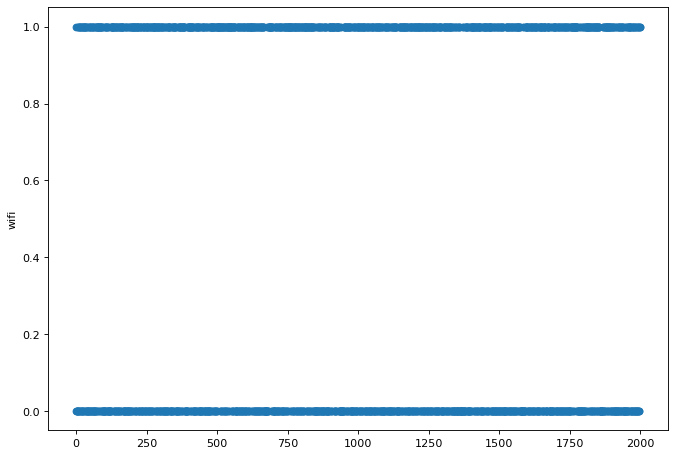

In [8]:
# check spread of features for each of them
for i in X.columns.to_list():
    plt.figure(figsize=(10, 7), dpi=80)
    plt.scatter(list(range(len(X))), X[i])
    plt.ylabel(i)
    plt.show()


C:\Users\barto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\barto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='px_height'>

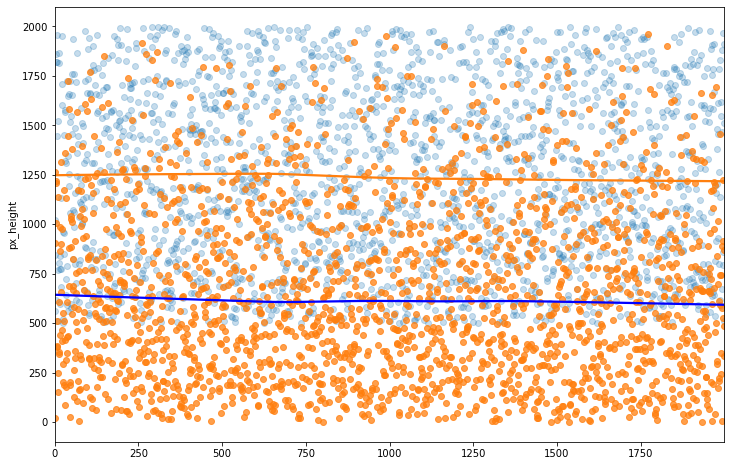

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.regplot(list(range(len(X))), X['battery_power'],scatter_kws={'alpha': 0.25}, line_kws={'color': 'C1'},lowess=True, ax=ax)
sns.regplot(list(range(len(X))), X['px_height'],scatter_kws={'alpha': 0.75}, line_kws={'color': 'b'},lowess=True, ax=ax)


In [43]:
X['px_height'].value_counts()

347     7
179     6
371     6
275     6
88      5
       ..
241     1
239     1
840     1
841     1
1960    1
Name: px_height, Length: 1137, dtype: int64

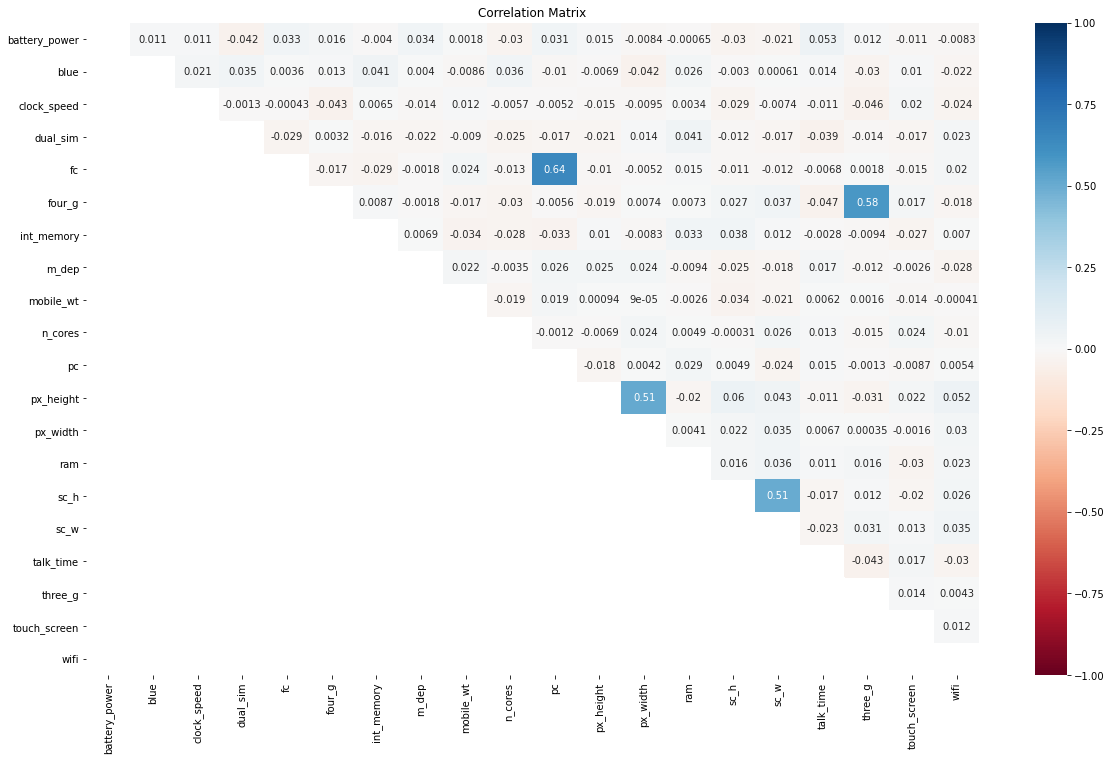

In [9]:
#heatmap of correlation, We can see there is not high correlation features
# creating mask , it is just for better view
mask = np.zeros_like(X.corr())
trina = np.tril_indices_from(mask)
mask[trina] =True

plt.figure(figsize=(20,12))
sns.heatmap(X.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1, mask = mask)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# split data for train and train 
X_train, X_test, y_train, ytest = train_test_split(X, Y, test_size=0.2)
min_max_scaler = MinMaxScaler()
x_train_norm = min_max_scaler.fit_transform(X_train)
x_test_norm = min_max_scaler.transform(X_test)

In [11]:
# PCA method doesn't work in this case. With 15 features accuracy decreases to 0.41
# from sklearn.decomposition import PCA
# pca = PCA(n_components=15)
# x_train_norm_PCA = pca.fit_transform(x_train_norm)
# x_test_norm_PCA = pca.transform(x_test_norm)

In [12]:
# tree_model = tree.DecisionTreeClassifier()
# tree_model.fit(x_train_norm_PCA, y_train)
# y_tree_pred = tree_model.predict(x_test_norm_PCA)
# con_tree = confusion_matrix(ytest, y_tree_pred)
# print(classification_report(ytest, y_tree_pred))
# print(con_tree)

# print(matthews_corrcoef(ytest, y_tree_pred))
# print(cohen_kappa_score(ytest, y_tree_pred))

# y_pred_proba = tree_model.predict_proba(x_test_norm_PCA)
# score = roc_auc_score(ytest, y_pred_proba, multi_class='ovr', average='weighted')
# print(score)

In [1]:
def my_confusion_matrix(y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    return cm

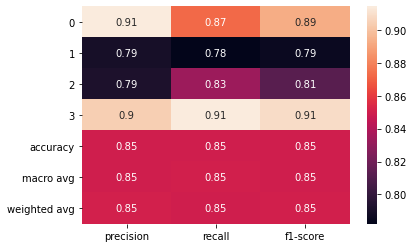

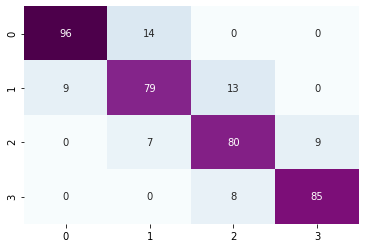

Matthews Corrcoef =  0.8000267672806368
Cohen Kappa Score =  0.7998532256988458
Roc Auc Score =  0.9001682476242656


In [14]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train_norm, y_train)
y_tree_pred = tree_model.predict(x_test_norm)
con_tree = confusion_matrix(ytest, y_tree_pred)


clf_report = classification_report(ytest,y_tree_pred,labels=np.arange(4),output_dict=True)                              
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

sns.heatmap(con_tree, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.show()

print('Matthews Corrcoef = ',matthews_corrcoef(ytest, y_tree_pred))
print('Cohen Kappa Score = ',cohen_kappa_score(ytest, y_tree_pred))
y_pred_proba = tree_model.predict_proba(x_test_norm)
score = roc_auc_score(ytest, y_pred_proba, multi_class='ovr', average='weighted')
print('Roc Auc Score = ',score)
tree_model_accuracy = accuracy_score(ytest, y_tree_pred)

C:\Users\barto\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:29:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


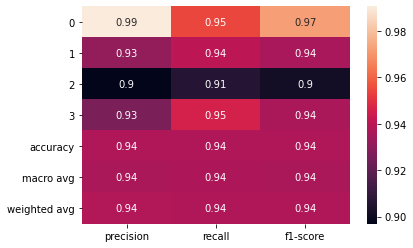

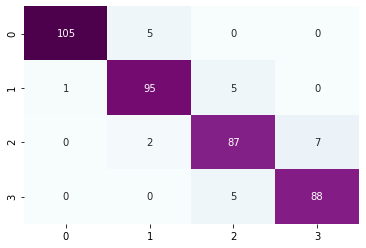

Matthews Corrcoef =  0.8000267672806368
Cohen Kappa Score =  0.7998532256988458


In [15]:
xgboost_c = xgboost.XGBClassifier()
xgboost_c.fit(x_train_norm, y_train)
y_xgb = xgboost_c.predict(x_test_norm)
con_xgb = confusion_matrix(ytest,y_xgb )


clf_report = classification_report(ytest,y_xgb,labels=np.arange(4),output_dict=True)                              
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

sns.heatmap(con_xgb, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.show()

print('Matthews Corrcoef = ',matthews_corrcoef(ytest, y_tree_pred))
print('Cohen Kappa Score = ',cohen_kappa_score(ytest, y_tree_pred))
# y_pred_proba = tree_model.predict_proba(x_test_norm)
# score = roc_auc_score(ytest, y_pred_proba, multi_class='ovr', average='weighted')
# print('Roc Auc Score = ',score)

xboost_accuracy= accuracy_score(ytest, y_xgb)

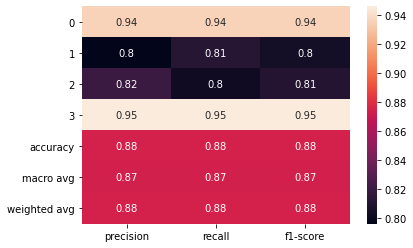

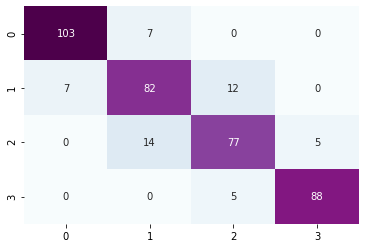

Matthews Corrcoef =  0.8000267672806368
Cohen Kappa Score =  0.7998532256988458


In [16]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(x_train_norm, y_train)
y_pred_rf = rnd_clf.predict(x_test_norm)
con_rf = confusion_matrix(ytest,y_pred_rf )

clf_report = classification_report(ytest,y_pred_rf,labels=np.arange(4),output_dict=True)                              
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

sns.heatmap(con_rf, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.show()

print('Matthews Corrcoef = ',matthews_corrcoef(ytest, y_tree_pred))
print('Cohen Kappa Score = ',cohen_kappa_score(ytest, y_tree_pred))
# y_pred_proba = tree_model.predict_proba(x_test_norm)
# score = roc_auc_score(ytest, y_pred_proba, multi_class='ovr', average='weighted')
# print('Roc Auc Score = ',score)
Random_Forest_accuracy= accuracy_score(ytest, y_pred_rf)

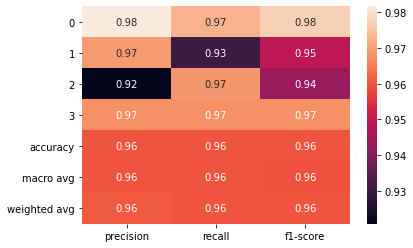

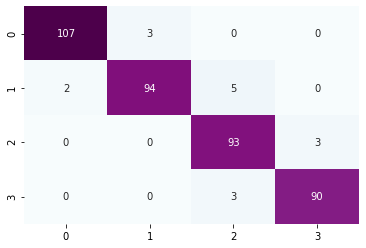

Matthews Corrcoef =  0.8000267672806368
Cohen Kappa Score =  0.7998532256988458


In [17]:
svm_clf = SVC(kernel = 'linear',probability=True)
svm_clf.fit(x_train_norm, y_train)
SVC_CL = svm_clf.predict(x_test_norm)
con_rf = confusion_matrix(ytest, SVC_CL)

clf_report = classification_report(ytest,SVC_CL,labels=np.arange(4),output_dict=True)                              
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

sns.heatmap(con_rf, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.show()

print('Matthews Corrcoef = ',matthews_corrcoef(ytest, y_tree_pred))
print('Cohen Kappa Score = ',cohen_kappa_score(ytest, y_tree_pred))


SVC_accuracy= accuracy_score(ytest, SVC_CL)

Epoch 1/200
100/100 [==============================] - 2s 4ms/step - loss: 1.3892 - accuracy: 0.2763
Epoch 2/200
100/100 [==============================] - 0s 3ms/step - loss: 1.3210 - accuracy: 0.3619
Epoch 3/200
100/100 [==============================] - 0s 4ms/step - loss: 1.2527 - accuracy: 0.4156
Epoch 4/200
100/100 [==============================] - 0s 4ms/step - loss: 1.1543 - accuracy: 0.4894
Epoch 5/200
100/100 [==============================] - 0s 4ms/step - loss: 1.0421 - accuracy: 0.5425
Epoch 6/200
100/100 [==============================] - 0s 4ms/step - loss: 0.9192 - accuracy: 0.6100
Epoch 7/200
100/100 [==============================] - 0s 4ms/step - loss: 0.8277 - accuracy: 0.6513
Epoch 8/200
100/100 [==============================] - 0s 4ms/step - loss: 0.7484 - accuracy: 0.6812
Epoch 9/200
100/100 [==============================] - 0s 4ms/step - loss: 0.7128 - accuracy: 0.7006
Epoch 10/200
100/100 [==============================] - 0s 4ms/step - loss: 0.6533 - accura

100/100 [==============================] - 0s 4ms/step - loss: 0.1173 - accuracy: 0.9544
Epoch 160/200
100/100 [==============================] - 0s 4ms/step - loss: 0.1229 - accuracy: 0.9456
Epoch 161/200
100/100 [==============================] - 1s 5ms/step - loss: 0.1014 - accuracy: 0.9625
Epoch 162/200
100/100 [==============================] - 1s 6ms/step - loss: 0.1144 - accuracy: 0.9544
Epoch 163/200
100/100 [==============================] - 1s 5ms/step - loss: 0.1172 - accuracy: 0.9506
Epoch 164/200
100/100 [==============================] - 0s 4ms/step - loss: 0.1344 - accuracy: 0.9413
Epoch 165/200
100/100 [==============================] - 0s 4ms/step - loss: 0.1301 - accuracy: 0.9469
Epoch 166/200
100/100 [==============================] - 0s 4ms/step - loss: 0.1214 - accuracy: 0.9463
Epoch 167/200
100/100 [==============================] - 0s 5ms/step - loss: 0.1180 - accuracy: 0.9538
Epoch 168/200
100/100 [==============================] - 0s 4ms/step - loss: 0.1286 - a

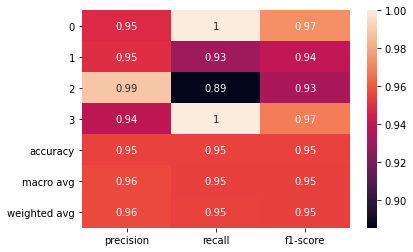

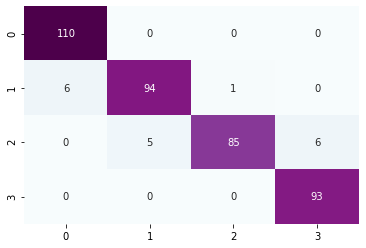

Matthews Corrcoef =  0.9405805119614591
Cohen Kappa Score =  0.9398887942693984


In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(x_train_norm.shape[1], 1)))
model.add(tf.keras.layers.Dense(300, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(200, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(4 , activation='softmax'))
model.compile(optimizer='sgd', loss='SparseCategoricalCrossentropy',metrics='accuracy')
model.fit(x_train_norm, y_train, epochs=200, verbose='auto',batch_size=16)
Y_predictions_test = model.predict(x_test_norm)

con_tree = confusion_matrix(ytest, np.argmax(Y_predictions_test, axis=1))

clf_report = classification_report(ytest,np.argmax(Y_predictions_test, axis=1),labels=np.arange(4),output_dict=True)                              
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
plt.show()

sns.heatmap(con_tree, annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.show()

print('Matthews Corrcoef = ',matthews_corrcoef(ytest, np.argmax(Y_predictions_test, axis=1)))
print('Cohen Kappa Score = ',cohen_kappa_score(ytest, np.argmax(Y_predictions_test, axis=1)))

Keras_accuracy= accuracy_score(ytest, np.argmax(Y_predictions_test, axis=1))

In [36]:
# preparing data for visualization
importance = tree_model.feature_importances_
tree_fetures_list = importance.tolist()

importance = xgboost_c.feature_importances_
Xboost_fetures_list = importance.tolist()

importance = rnd_clf.feature_importances_
rf_fetures_list = importance.tolist()

swc_list = svm_clf.coef_[0].tolist()


In [21]:
# comparing  weight of features in all models

cm = sns.light_palette("blue", as_cmap=True)
df_features = pd.DataFrame(list(zip(X.columns.to_list(),tree_fetures_list,Xboost_fetures_list,rf_fetures_list,swc_list)),columns =[
    'Name of feature', ' Tree ',' Xboost ','Random Forest' , ' SVC '])
df_features.style.background_gradient(cmap=cm) 

,Name of feature,Tree,Xboost,Random Forest,SVC
0,battery_power,0.122513,0.128756,0.075321,-2.533424
1,blue,0.000000,0.007947,0.007037,0.014592
2,clock_speed,0.001111,0.014347,0.028152,0.056735
3,dual_sim,0.000833,0.027854,0.007200,0.055865
4,fc,0.001945,0.022335,0.026324,-0.126211
5,four_g,0.004572,0.013617,0.006130,-0.134837
6,int_memory,0.006034,0.015748,0.037545,-0.114833
7,m_dep,0.008353,0.018805,0.024232,-0.187925
8,mobile_wt,0.015221,0.028110,0.042102,-0.169839
9,n_cores,0.003768,0.023562,0.021847,0.133860


In [34]:

data = [['Tree', tree_model_accuracy], ['xboost', xboost_accuracy], ['Random_f', Random_Forest_accuracy],
        ['SVC', SVC_accuracy], ['Keras', Keras_accuracy]]
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Accuracy'])
# df = df.set_index('Name')

(0.6, 1.0)

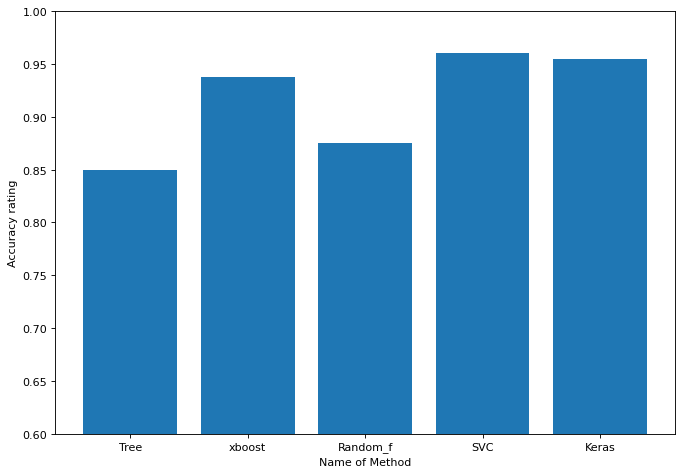

In [35]:
# Visualization of accuracy
plt.figure(figsize=(10, 7), dpi=80)
plt.bar( df['Name'],df['Accuracy'],width=0.8)
plt.xlabel('Name of Method')
plt.ylabel('Accuracy rating')
plt.ylim([0.6, 1])

### Conclusion
Dataset is good preparation for deep learning because all columns are float or int type. Data are distributed equally by groups. We are able to get approximately 95% of accuracy without extra efforts(changing hyperparameters etc)
For learning, we used 5 models TreeDercision, Xboost , RandomForest , SVC, TensorFlow. The last 2 methods we received more than 90 of accuracy